# Benford  for Python

### This little module is an attempt to facilitate the performance of Benford's Law-related tests by people using Python, whether interactively or in an automated, scripting way.
### It is open source, licensed under the GNU General Public License version 3.

# Benford's Law

### Benford’s Law (BL) is the counter-intuitive finding that the first digits of the numbers in certain series do not follow a uniform distribution, rather having the lower digits more frequently distributed than the higher ones.

### So, the nine possible first digits (1, 2, 3,.., 9) of datasets compliant to BL don't display the instinctual 1/9, or 0.1111 uniform distribution, being instead apportioned according to the logarithm function bellow:

## $$P(D=d_1) = \log_{10}(1+1/d_1)$$

### Where D is the first digit you want to find the distribution of, and d1 is a digit from 1 to 9 (0 doesn't count as a first digit).

### [Figure First Digits]

### First let's import some libraries and get some public data

#### Imports

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib notebook

#### Fetch S&P500 ETF market data

In [2]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01', end='2016-10-31')

In [3]:
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.165877
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.366203
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.426269
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.726791
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.846986


#### Now let's add some computed information

In [4]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-10-25,214.679993,214.979996,213.979996,214.169998,66542300,214.169998,-0.003351,-0.003356
2016-10-26,213.210007,214.419998,212.929993,213.740005,75705500,213.740005,-0.002008,-0.002010
2016-10-27,214.580002,214.619995,213.080002,213.169998,77220200,213.169998,-0.002667,-0.002670
2016-10-28,213.139999,213.929993,211.710007,212.539993,140623200,212.539993,-0.002955,-0.002960
2016-10-31,212.929993,213.190002,212.360001,212.550003,61272500,212.550003,0.000047,0.000047


#### Now let's plot the histogram of the SPY *log returns*. It tends to a normal distribution.

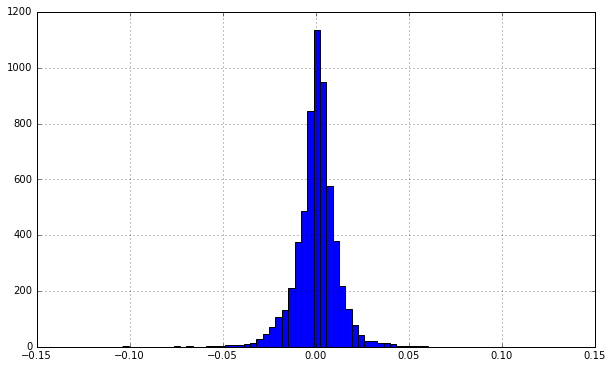

In [5]:
sp.l_r.hist(bins=70, figsize=(10,6))

#### Now let's get to Benford

In [6]:
import benford as bf

##### The classes First, Second and LastTwo represent the Benfords's Expected proportions for the first, second and last two digits. Note that First may be applied to the first one, first two and first three digits by changing the 'digs' parameter. Plotting the expected proportions is True by default, but may be supressed if one only wants to use the resulting DataFrame.

In [ ]:
f1d = bf.First(1)

In [ ]:
f1d

In [ ]:
f2d = bf.First(2)

In [ ]:
sd = bf.Second() #note decrease in steapness

In [ ]:
l2d = bf.LastTwo()

### Now to real usage
##### Benford's Analysis is the study of a series of numbers through the recording of digits position and comparing the digits proportion in the series with Benford's expected didstributions.

##### The main class in the Benford module is 'Analysis'. It takes a sequence of numbers and creates a pandas DataFrame with columns that refer to the digits and their position in each number.

In [7]:
a = bf.Analysis(sp.l_r, sign='all', dec=6)  # used absolute values of SPY log returns
a.head(10)

Initialized sequence with 5926 registries.


,Seq,ZN,F1D,SD,F2D,F3D,L2D
Date,,,,,,,
1993-02-01,0.007087,7087,7,0,70,708,87
1993-02-02,0.002115,2115,2,1,21,211,15
1993-02-03,0.010516,10516,1,0,10,105,16
1993-02-04,0.004175,4175,4,1,41,417,75
1993-02-05,-0.000696,695,6,9,69,695,95
1993-02-09,-0.006974,6973,6,9,69,697,73
1993-02-10,0.001399,1398,1,3,13,139,98
1993-02-11,0.004881,4880,4,8,48,488,80
1993-02-12,-0.007680,7680,7,6,76,768,80



Test performed on 5926 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant deviations are:

             Expected     Found    Z_test
First_2_Dig                              
67           0.006434  0.010462  3.797192
10           0.041393  0.050624  3.535021
13           0.032185  0.039825  3.295490
15           0.028029  0.021431  3.037792
66           0.006531  0.009787  3.031587
24           0.017729  0.012487  3.008341

The Mean Absolute Deviation is 0.00140255201348
For the First Two Digits:
    - 0.0000 to 0.0012: Close Conformity
    - 0.0012 to 0.0018: Acceptable Conformity
    - 0.0018 to 0.0022: Marginally Acceptable Conformity
    - Above 0.0022: Nonconformity


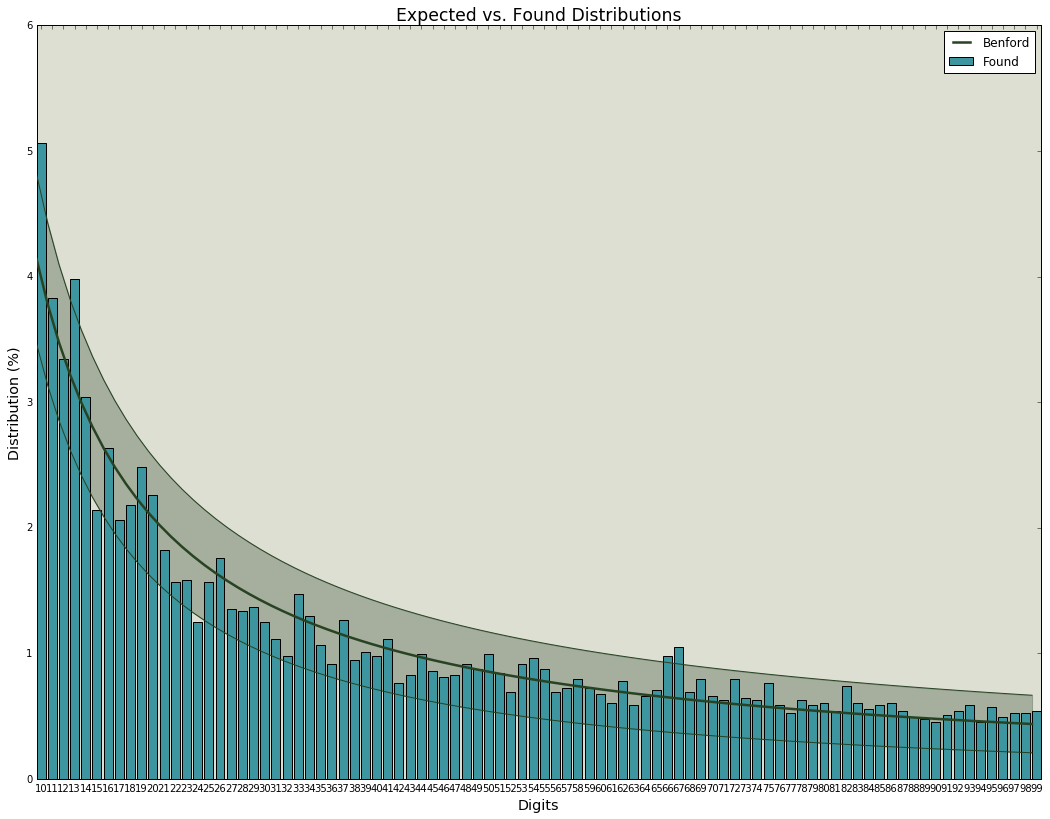

In [8]:
a.first_digits(2,conf_level=99, show_high_Z='all')#, limit_N=2500)


Test performed on 5926 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant deviations are:

             Expected     Found    Z_test
First_1_Dig                              
2            0.176091  0.158623  3.513329
3            0.124939  0.113061  2.745665
6            0.066947  0.075262  2.535032
9            0.045757  0.051974  2.259212
8            0.051153  0.057543  2.203496
7            0.057992  0.064293  2.047502

The Mean Absolute Deviation is 0.00814461661944
For the First Digit:
    - 0.0000 to 0.006: Close Conformity
    - 0.006 to 0.012: Acceptable Conformity
    - 0.012 to 0.015: Marginally Acceptable Conformity
    - Above 0.015: Nonconformity


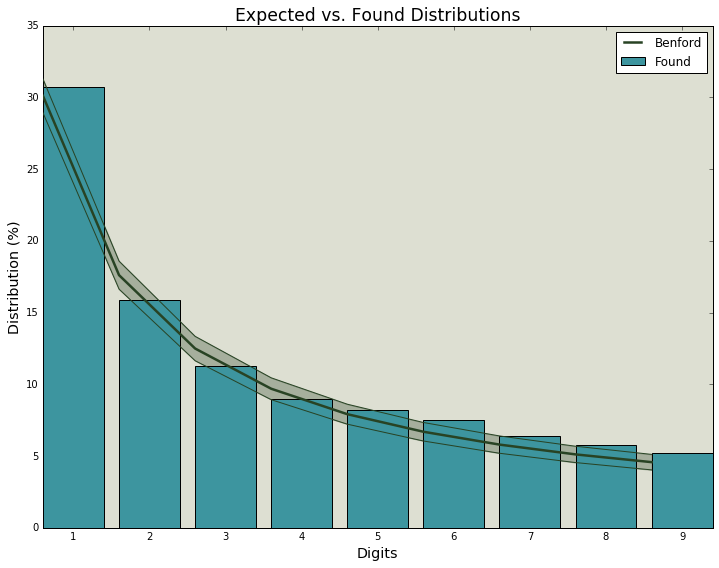

In [9]:
a.first_digits(1, conf_level=95, show_high_Z='all')


Test performed on 5926 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_test]
Index: []

The Mean Absolute Deviation is 0.00447150482018
    For the Second Digits:
    - 0.000 to 0.008: Close Conformity
    - 0.008 to 0.010: Acceptable Conformity
    - 0.010 to 0.012: Marginally Acceptable Conformity
    - Above 0.012: Nonconformity


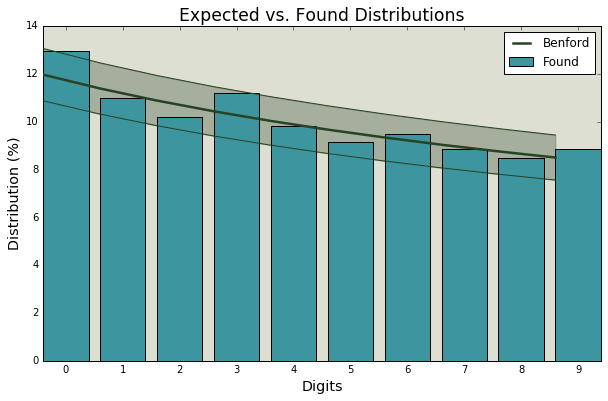

In [10]:
a.second_digit(conf_level=99, show_high_Z='all')#, limit_N=2500)


Test performed on 5926 registries.
Discarded 38 records < 100 after preparation.

The entries with the significant deviations are:

             Expected     Found    Z_test
First_3_Dig                              
952          0.000456  0.001529  3.550026
997          0.000435  0.001359  3.083834
823          0.000527  0.001529  3.062289
695          0.000624  0.001698  3.037940
962          0.000451  0.001359  2.972068
945          0.000459  0.001359  2.916663
139          0.003113  0.005265  2.846766
751          0.000578  0.001529  2.764104
171          0.002532  0.004416  2.745906
874          0.000497  0.001359  2.676629
101          0.004279  0.006624  2.656734
862          0.000504  0.001359  2.634577
343          0.001264  0.002548  2.587617
821          0.000529  0.001359  2.487337
587          0.000739  0.001698  2.468198
247          0.001755  0.000340  2.438688
802          0.000541  0.001359  2.417123
673          0.000645  0.001529  2.414509
671          0.000647  0.00

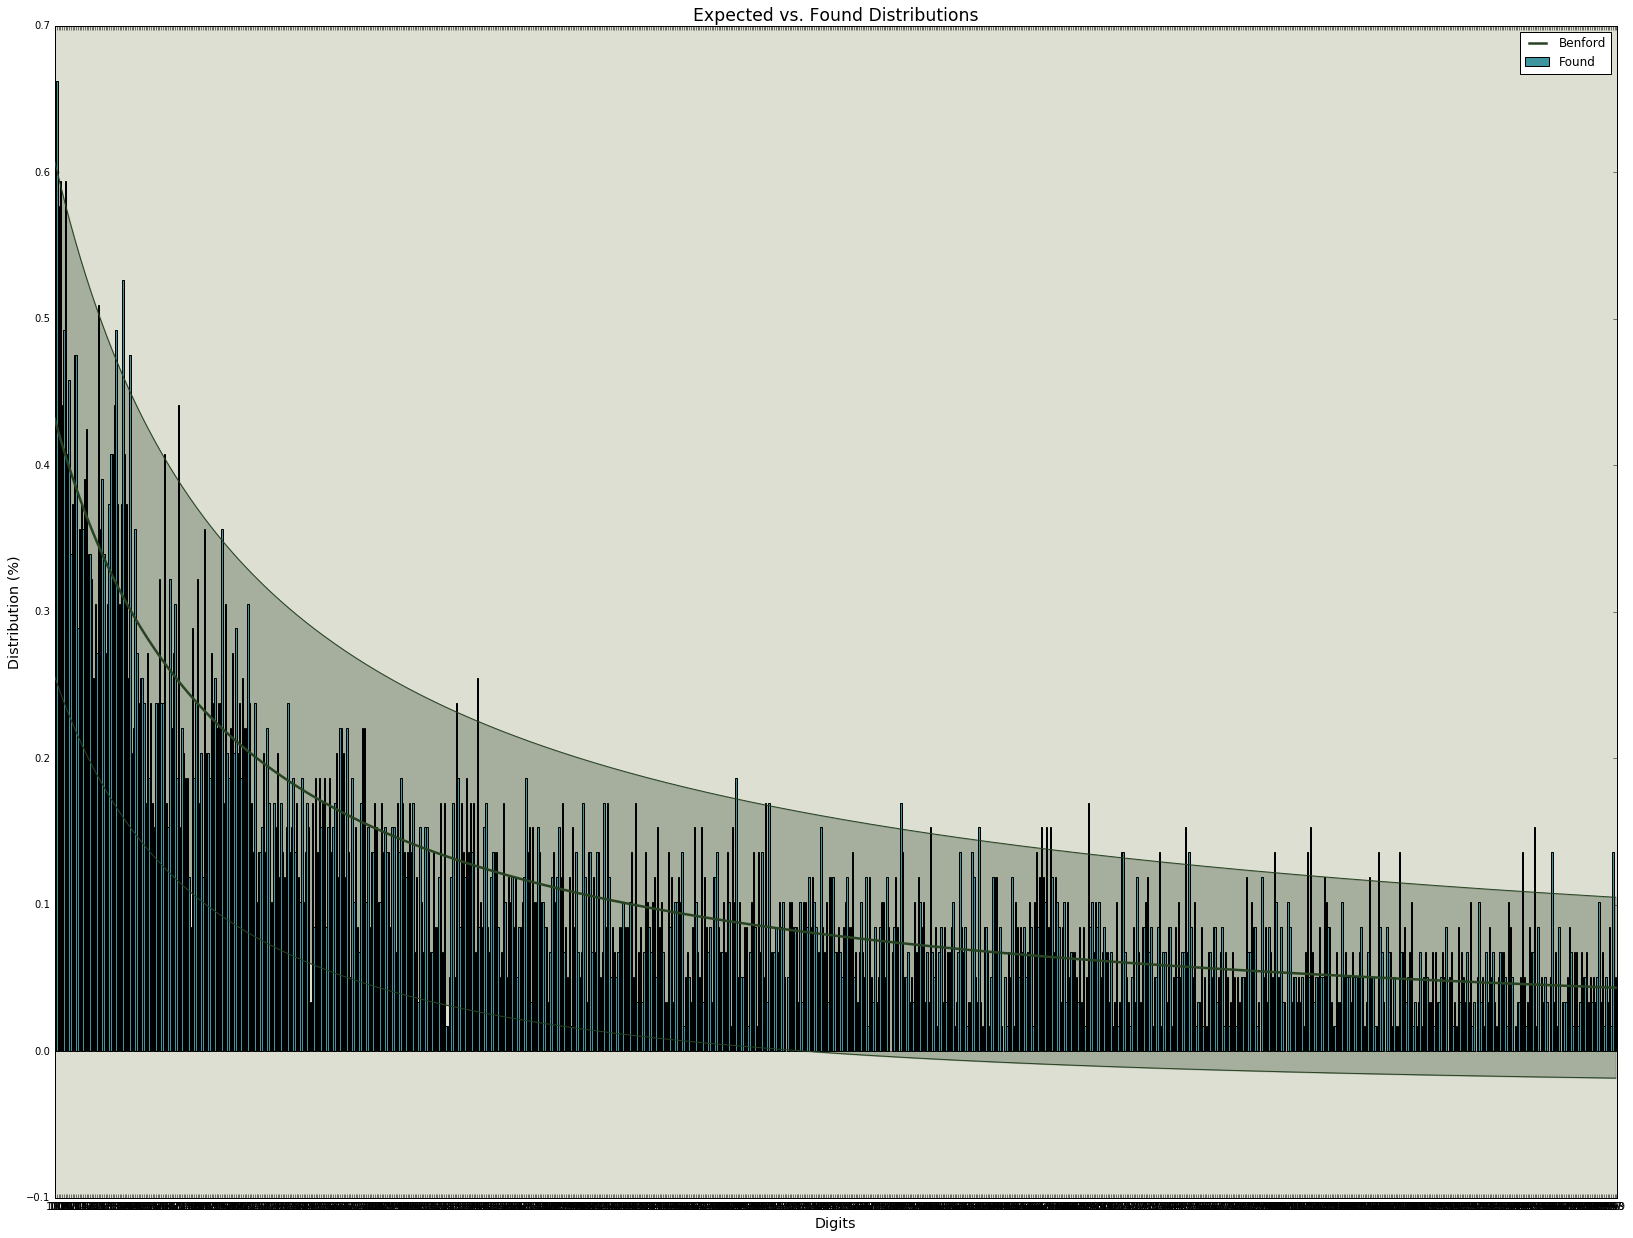

In [11]:
a.first_digits(3, conf_level=95, show_high_Z='all')


Test performed on 5926 registries.
Discarded 655 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected     Found    Z_test
Last_2_Dig                              
14          0.010101  0.013849  2.652634
19          0.010101  0.013849  2.652634
16          0.010101  0.013090  2.101654
89          0.010101  0.012901  1.963909


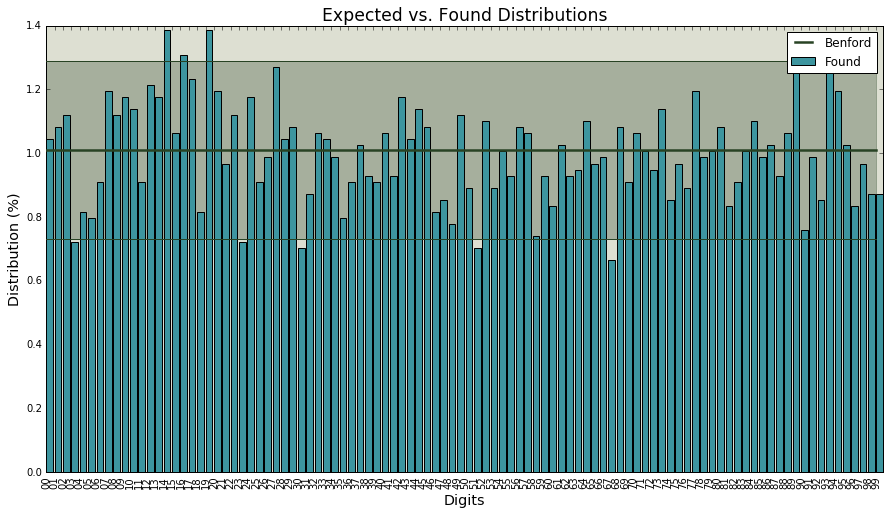

In [12]:
a.last_two_digits()

In [ ]:
s =a.summation(digs=2, top=5)

In [ ]:
a.groupby('L2D').sum()